# Titanic - Machine Learning from Disaster

## Decision Tree Model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyName,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,73,0
1,1,1,0,38.0,1,0,596,71.28,0,136,0
2,1,3,0,26.0,0,0,669,7.92,2,251,0
3,1,1,0,35.0,1,0,49,26.55,2,198,0
4,0,3,1,35.0,0,0,472,8.05,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,406,0
887,1,1,0,19.0,0,0,14,30.00,2,221,0
888,0,3,0,29.0,1,2,675,11.72,2,293,0
889,1,1,1,26.0,0,0,8,30.00,0,52,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived", "Age", "Fare"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 8), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 8), (223,))

## Modeling

In [8]:
from common import functions as func

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [9]:
# space = dict()
# space['criterion'] = ["gini", "entropy"]
# space['splitter'] = ["best", "random"]
# space['max_depth'] = [n for n in range(20)]
# space['min_samples_split'] = [n for n in range(20)]
# space['min_samples_leaf'] = [n for n in range(20)]

# func.show_best_hyperparameter_optimization(
#     DecisionTreeClassifier(), 
#     space, 
#     X_train, 
#     y_train
# )

**Building, train and predict model**

In [10]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6, 
    min_samples_leaf=3,
    splitter="random")

pipeline = make_pipeline(
    StandardScaler(),
    decision_tree_classifier
)

_ = pipeline.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [11]:
func.get_feature_importances(decision_tree_classifier, X_train)

,Features,Relevance (%)
1,Sex,49
0,Pclass,24
6,FamilyName,8
4,Ticket,6
3,Parch,5
5,Embarked,4
2,SibSp,3
7,AgeGroup,1


__Predict and show model result__

In [12]:
y_predict = pipeline.predict(X_test)
func.show_model_result(pipeline, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.7877095  0.80337079 0.83146067 0.78651685 0.80337079]
Mean = 0.80 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[115  19]
 [ 27  62]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       134
           1       0.77      0.70      0.73        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

----------------------------------------------------------------------
Accuracy: 0.79
Precicion: 0.77
Sensitivity aka Recall: 0.70
F1-Score: 0.73


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.78
----------------------------------------------------------------------


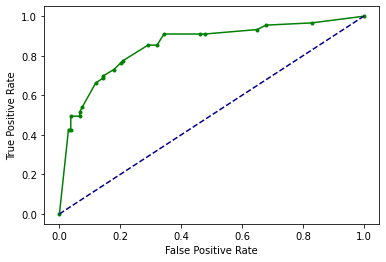

In [13]:
func.show_curve_roc(pipeline, X_test, y_test, y_predict)

__Compare Ground Truth vs Prediction Model__

In [14]:
func.get_error_prediction(X_test, y_test, y_predict)

,Pclass,Sex,SibSp,Parch,Ticket,Embarked,FamilyName,AgeGroup,Ground Truth,Prediction
709,3,1,1,1,189,0,414,0,1,0
621,1,1,1,0,56,2,311,0,1,0
447,1,1,0,0,45,2,544,0,1,0
673,2,1,0,0,145,2,645,0,1,0
141,3,0,0,0,332,2,442,0,1,0
235,3,0,0,0,677,2,237,0,0,1
204,3,1,0,0,530,2,117,0,1,0
23,1,1,0,0,42,2,568,0,1,0
362,3,0,0,1,211,0,39,0,0,1
659,1,1,0,2,416,0,430,0,0,1


In [15]:
train_df[train_df["Ticket"] == 203]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyName,AgeGroup
140,0,3,0,29.0,0,2,203,7.62,0,67,0
852,0,3,0,9.0,1,1,203,7.62,0,67,1


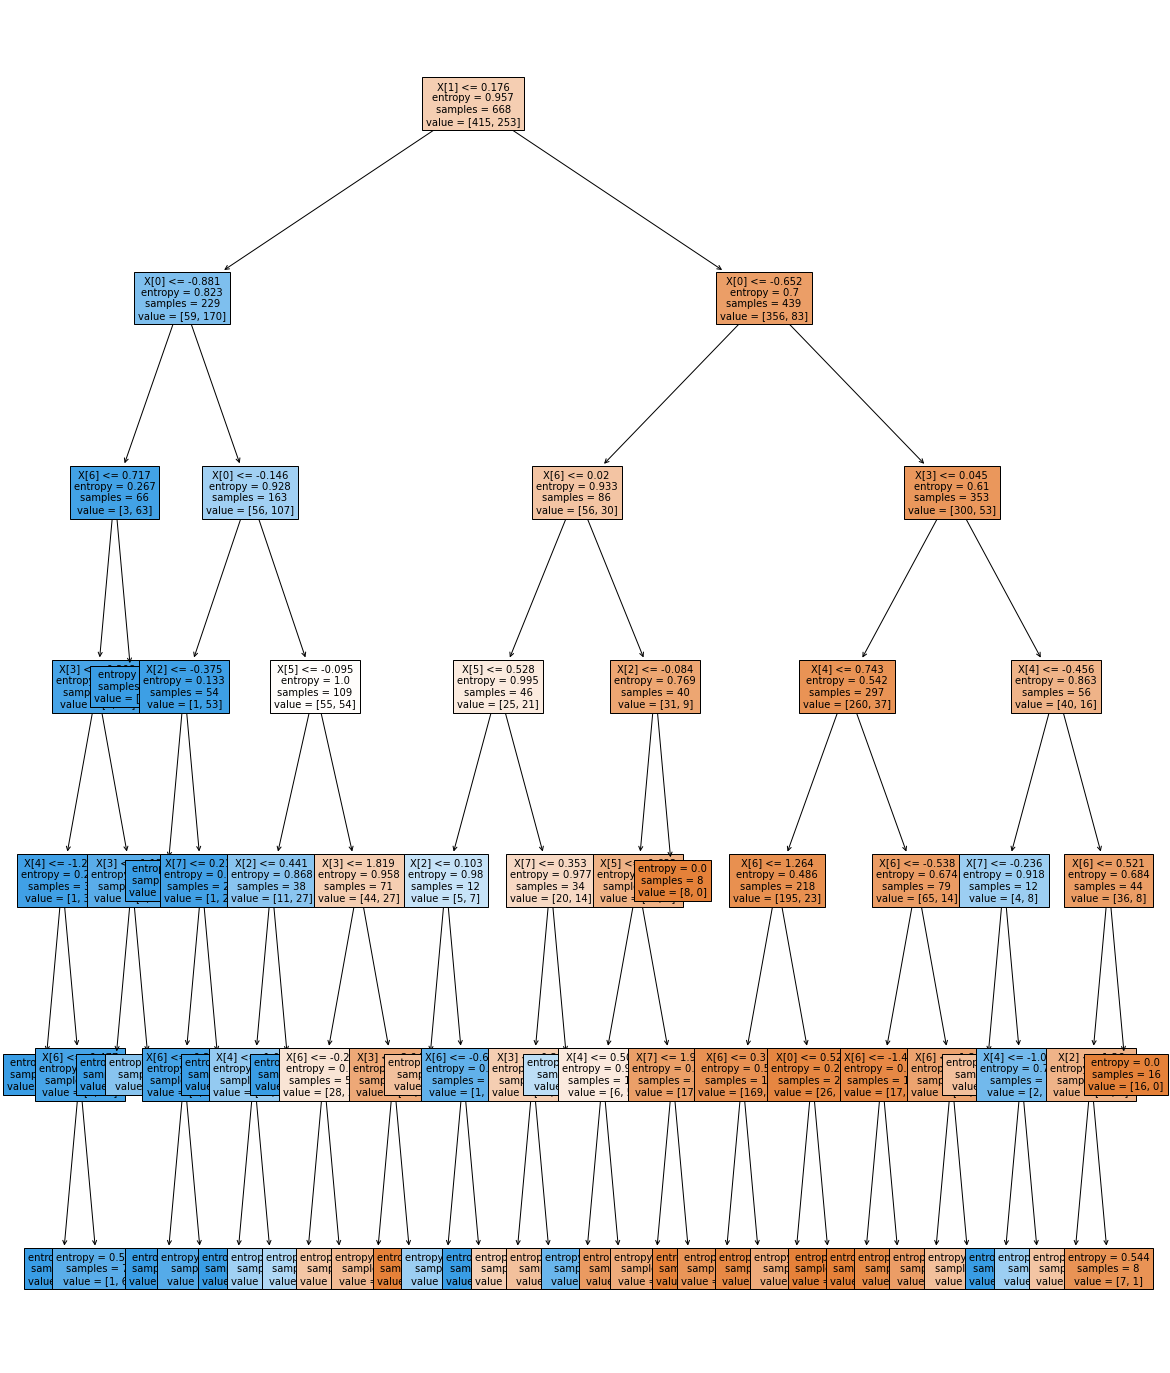

In [16]:
plt.figure(figsize=(20, 25))
tree.plot_tree(decision_tree_classifier, filled=True, fontsize=10)
plt.show()